<a href="https://colab.research.google.com/github/kabil-wq/kabilan/blob/main/restaurant_cuisine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Dataset  (1).csv')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
print("Column Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [ ]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
# Check for missing values in each column
missing_values_count = df.isnull().sum()
print(missing_values_count)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


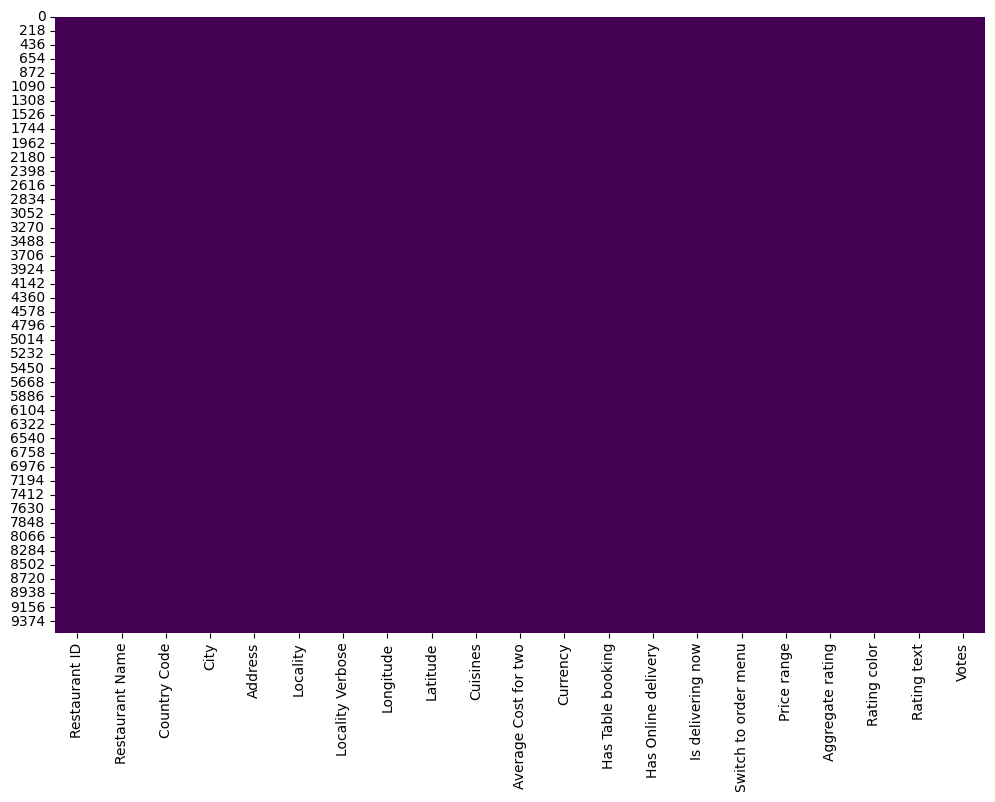

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [ ]:
# Drop rows with any missing values
df_dropped_rows = df.dropna()

# Drop columns with any missing values
df_dropped_cols = df.dropna(axis=1)


In [ ]:
# Drop rows with more than 50% missing values
df_dropped_thresh_rows = df.dropna(thresh=len(df.columns) * 0.5)

# Drop columns with more than 50% missing values
df_dropped_thresh_cols = df.dropna(axis=1, thresh=len(df) * 0.5)


In [ ]:
# Fill missing values in the 'Cuisines' column with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')


In [ ]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
df['Cuisines'] = df['Cuisines'].str.split(', ')
cuisines_expanded = df.explode('Cuisines')

In [ ]:
top_cuisines = cuisines_expanded['Cuisines'].value_counts().head(3)
total_restaurants = df.shape[0]
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100

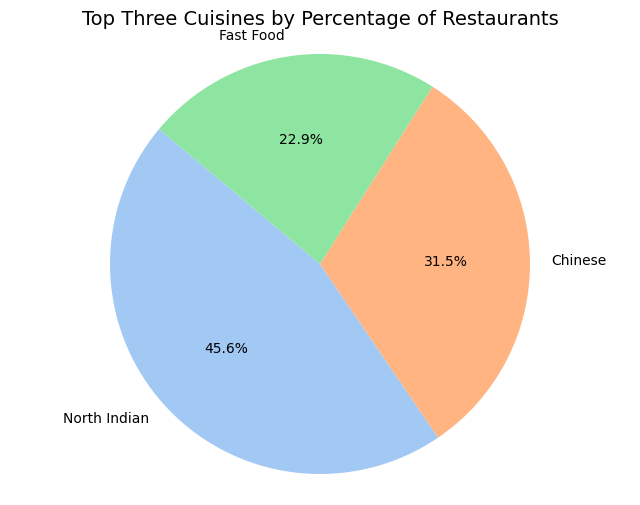

In [ ]:
labels = top_cuisines.index
sizes = top_cuisines_percentage
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Three Cuisines by Percentage of Restaurants', fontsize=14)
plt.axis('equal')
plt.show()


<ipython-input-12-f7a88ba22c79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sizes, y=labels, palette='viridis')


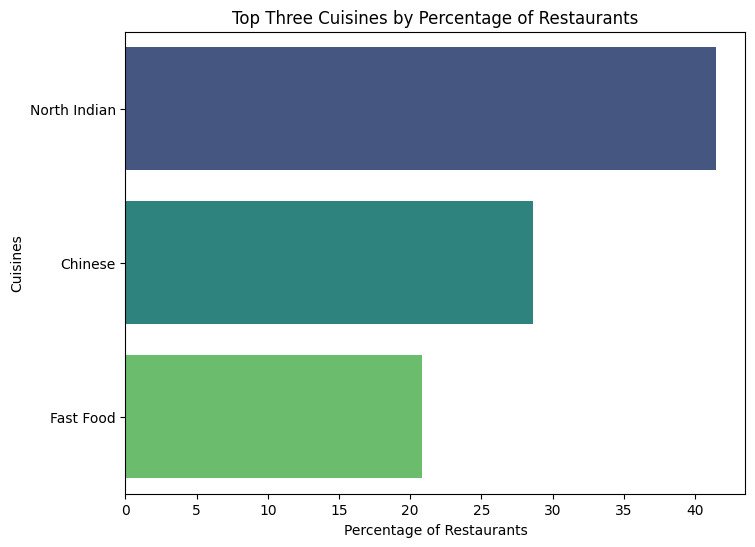

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sizes, y=labels, palette='viridis')
plt.xlabel('Percentage of Restaurants')
plt.ylabel('Cuisines')
plt.title('Top Three Cuisines by Percentage of Restaurants')
plt.show()

In [ ]:
city_counts = df['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()
city_with_most_restaurants_count = city_counts.max()
print(f"City with the highest number of restaurants: {city_with_most_restaurants} ({city_with_most_restaurants_count} restaurants)")

City with the highest number of restaurants: New Delhi (5473 restaurants)


In [ ]:
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average rating for restaurants in each city:")
print(average_rating_by_city.head())

Average rating for restaurants in each city:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


In [ ]:
city_with_highest_avg_rating = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()
print(f"City with the highest average rating: {city_with_highest_avg_rating} (Average Rating: {highest_avg_rating})")

City with the highest average rating: Inner City (Average Rating: 4.9)


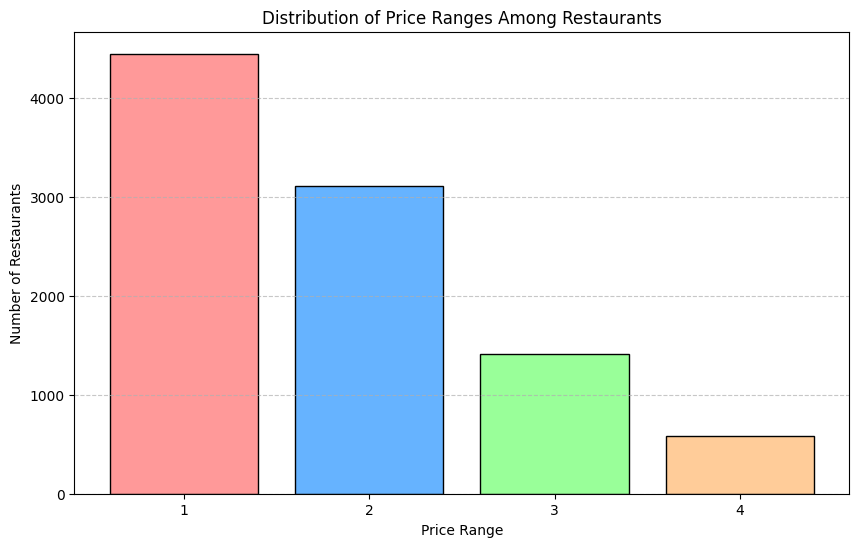

Percentage of restaurants in each price range category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [ ]:
price_range_counts = df['Price range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(price_range_counts.index, price_range_counts.values,
        color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'], edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(price_range_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
total_restaurants = df.shape[0]
price_range_percentages = (price_range_counts / total_restaurants) * 100
print("Percentage of restaurants in each price range category:")
print(price_range_percentages)

Percentage of restaurants with and without online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

Average ratings of restaurants with and without online delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


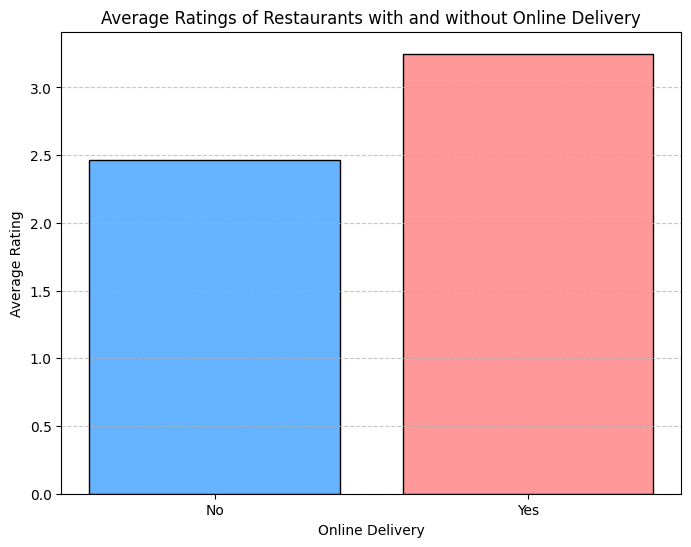

In [ ]:
online_delivery_counts = df['Has Online delivery'].value_counts()
total_restaurants = df.shape[0]
online_delivery_percentage = (online_delivery_counts / total_restaurants) * 100
print("Percentage of restaurants with and without online delivery:")
print(online_delivery_percentage)
average_rating_online = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("\nAverage ratings of restaurants with and without online delivery:")
print(average_rating_online)
plt.figure(figsize=(8, 6))
plt.bar(average_rating_online.index, average_rating_online.values, color=['#66B3FF', '#FF9999'], edgecolor='black')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Restaurants with and without Online Delivery')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

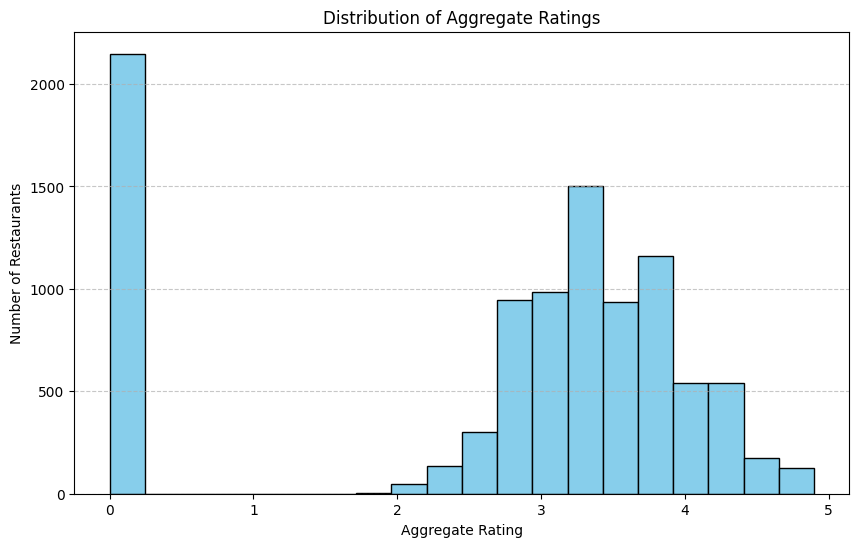

The most common rating range is: (3.0, 4.0]
The average number of votes received by restaurants is: 156.91


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Ensure 'Aggregate rating' is numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Step 1: Analyze the distribution of aggregate ratings
plt.figure(figsize=(10, 6))
df['Aggregate rating'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 2: Determine the most common rating range
rating_bins = [0, 1, 2, 3, 4, 5]
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=rating_bins, include_lowest=True)
most_common_rating_range = df['Rating Range'].value_counts().idxmax()
print(f"The most common rating range is: {most_common_rating_range}")

# Step 3: Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()
print(f"The average number of votes received by restaurants is: {average_votes:.2f}")


In [ ]:
from itertools import combinations

In [ ]:
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
# Example of loading data with appropriate parameters
df = pd.read_csv('/content/Dataset  (1).csv', encoding='utf-8', na_values=['', 'NA', 'NaN'])


In [ ]:
# Check the unique values in the 'Cuisines' column
print(df['Cuisines'].unique())

# Clean the column if necessary
df['Cuisines'] = df['Cuisines'].astype(str).apply(lambda x: x.strip() if isinstance(x, str) else x)


['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


In [ ]:
# Convert the 'Cuisines' column to lists
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)


In [ ]:
# Function to generate all combinations of cuisines
def get_combinations(cuisines_list):
    if cuisines_list is not None and len(cuisines_list) > 1:
        return list(combinations(cuisines_list, 2))
    else:
        return []

# Apply the function to the 'Cuisines' column
df['Cuisine Combinations'] = df['Cuisines'].apply(get_combinations)


In [ ]:
# Explode the combinations into separate rows
combinations_df = df.explode('Cuisine Combinations')

# Drop rows where 'Cuisine Combinations' is empty
combinations_df = combinations_df[combinations_df['Cuisine Combinations'].notna()]


In [ ]:
# Group by the 'Cuisine Combinations' and count
combinations_count = combinations_df.groupby('Cuisine Combinations').size().reset_index(name='Frequency')

# Sort by frequency in descending order
combinations_count = combinations_count.sort_values(by='Frequency', ascending=False)


In [ ]:
# Calculate the average rating for each combination
rating_by_combination = combinations_df.groupby('Cuisine Combinations')['Aggregate rating'].mean().reset_index(name='Average Rating')

# Merge the frequency and rating dataframes
combination_analysis = pd.merge(combinations_count, rating_by_combination, on='Cuisine Combinations')

# Sort by average rating in descending order
combination_analysis = combination_analysis.sort_values(by='Average Rating', ascending=False)


In [ ]:
# Print the most common cuisine combinations
print("Most Common Cuisine Combinations:")
print(combination_analysis.head(10))

# Print the cuisine combinations with the highest average ratings
print("\nCuisine Combinations with the Highest Average Ratings:")
print(combination_analysis.sort_values(by='Average Rating', ascending=False).head(10))


Most Common Cuisine Combinations:
               Cuisine Combinations  Frequency  Average Rating
1293               (BBQ, Breakfast)          1            4.90
884                 (Sandwich, Tea)          1            4.90
849         (Mexican, Healthy Food)          1            4.90
1481             (European, Indian)          1            4.90
533             (Sunda, Indonesian)          3            4.90
1233          (American, Caribbean)          1            4.90
1234     (American, Coffee and Tea)          1            4.90
718             (Filipino, Mexican)          2            4.85
722              (European, German)          2            4.80
1146  (Continental, Middle Eastern)          1            4.80

Cuisine Combinations with the Highest Average Ratings:
            Cuisine Combinations  Frequency  Average Rating
1293            (BBQ, Breakfast)          1            4.90
849      (Mexican, Healthy Food)          1            4.90
1481          (European, Indian)     

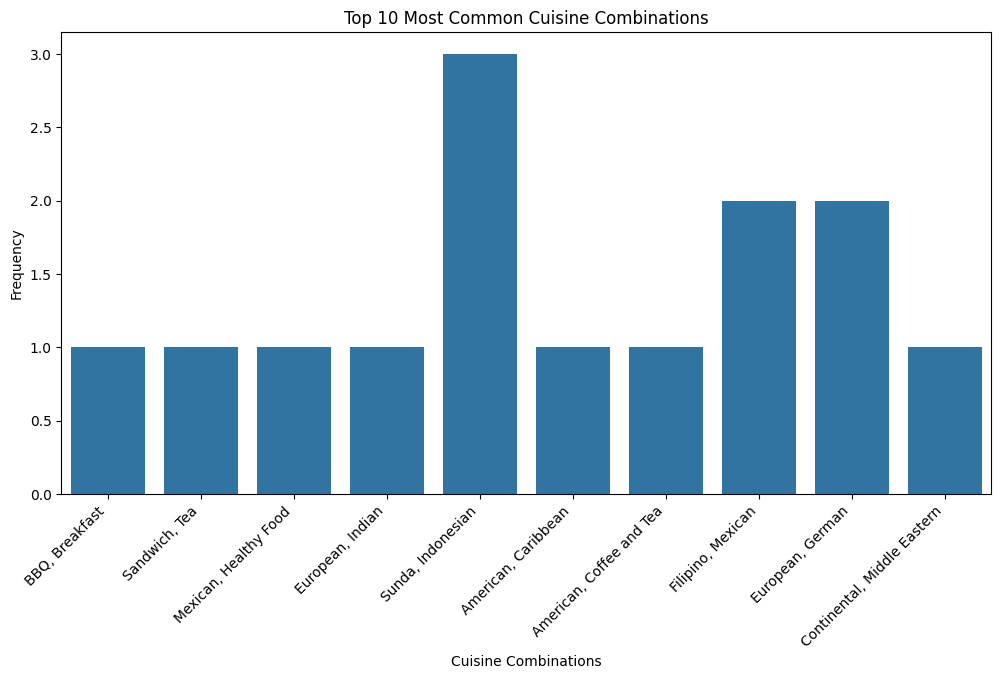

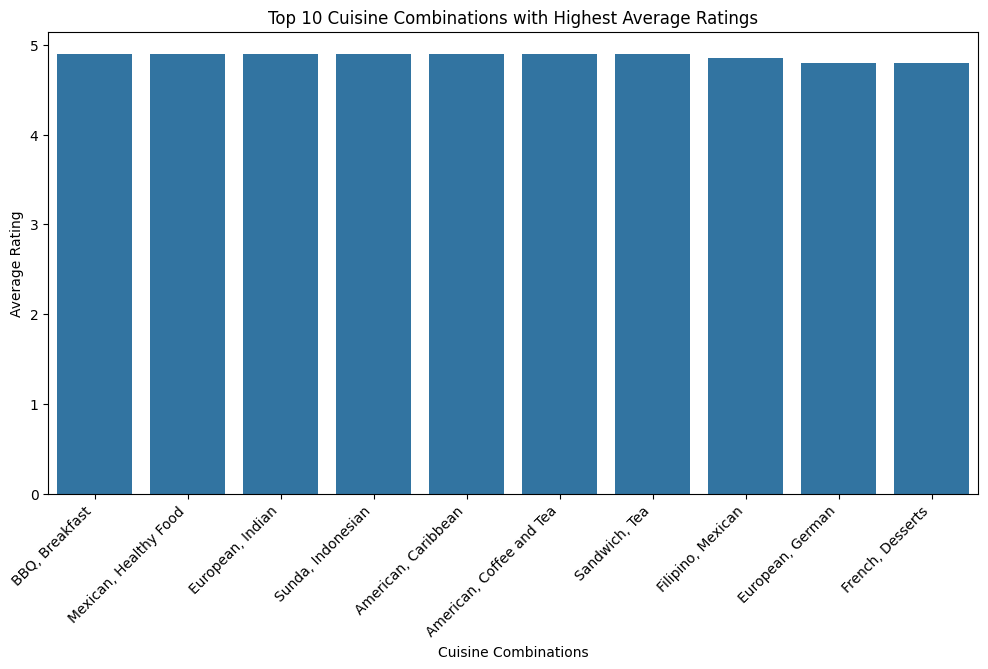

In [ ]:
# Convert the tuple combinations to string format
combination_analysis['Cuisine Combinations'] = combination_analysis['Cuisine Combinations'].apply(lambda x: ', '.join(x) if isinstance(x, tuple) else x)

# Plot the top 10 most common cuisine combinations
plt.figure(figsize=(12, 6))
sns.barplot(data=combination_analysis.head(10), x='Cuisine Combinations', y='Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.show()

# Plot the top 10 cuisine combinations with the highest average ratings
plt.figure(figsize=(12, 6))
sns.barplot(data=combination_analysis.sort_values(by='Average Rating', ascending=False).head(10), x='Cuisine Combinations', y='Average Rating')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cuisine Combinations with Highest Average Ratings')
plt.show()


In [ ]:
import folium

In [ ]:
restaurant_map.save("restaurant_map.html")


In [ ]:
import plotly.express as px

In [ ]:
# Create an interactive scatter map with Plotly
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data=["Cuisines", "Aggregate rating"],
    color_discrete_sequence=["fuchsia"],
    zoom=10,
    height=600
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

# Extract coordinates for clustering
coords = df[['Latitude', 'Longitude']].values

# Define the DBSCAN model with appropriate parameters
db = DBSCAN(eps=0.01, min_samples=5, metric='euclidean').fit(coords)

# Add the cluster labels to the dataframe
df['Cluster'] = db.labels_

# Check if the 'Cluster' column is added
print(df['Cluster'].head())


0   -1
1   -1
2    0
3    0
4    0
Name: Cluster, dtype: int64


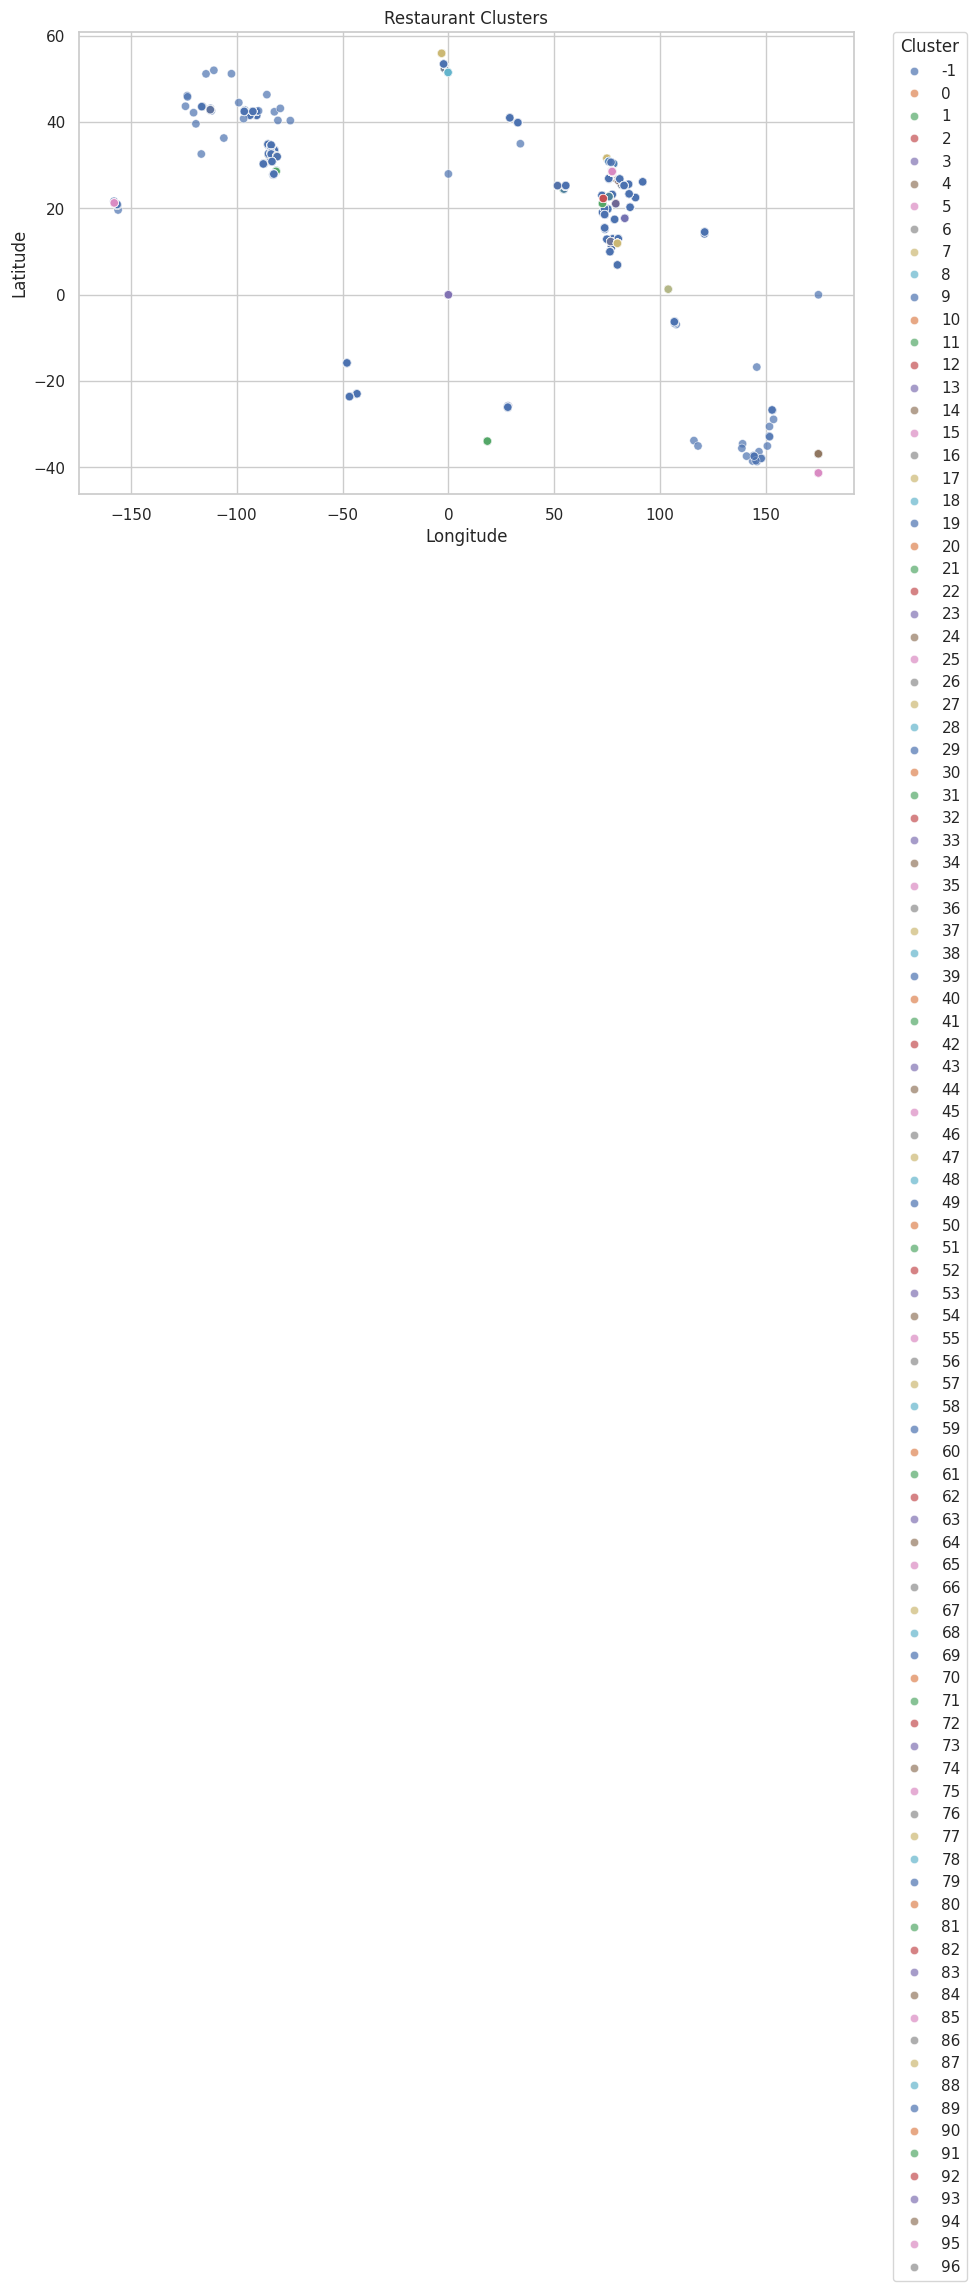

In [ ]:
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid", context="notebook")

# Create a scatter plot with hue as cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="Cluster",
    palette="deep",
    edgecolor="white",
    alpha=0.7
)

plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame and it has been correctly loaded and preprocessed

# Extract coordinates for clustering
coords = df[['Latitude', 'Longitude']].values

# Apply DBSCAN clustering
db = DBSCAN(eps=0.02, min_samples=5, metric='euclidean').fit(coords)

# Add the cluster labels to the DataFrame
df['Cluster'] = db.labels_

# Group by cluster and calculate mean latitude and longitude for each cluster
cluster_centers = df.groupby('Cluster')[['Latitude', 'Longitude']].mean().reset_index()

# Merge cluster centers with the original DataFrame to get locality info
cluster_info = pd.merge(cluster_centers, df[['Cluster', 'City', 'Locality']].drop_duplicates(), on='Cluster', how='left')

# Count number of restaurants in each cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Merge cluster counts with cluster info
cluster_analysis = pd.merge(cluster_info, cluster_counts, on='Cluster')


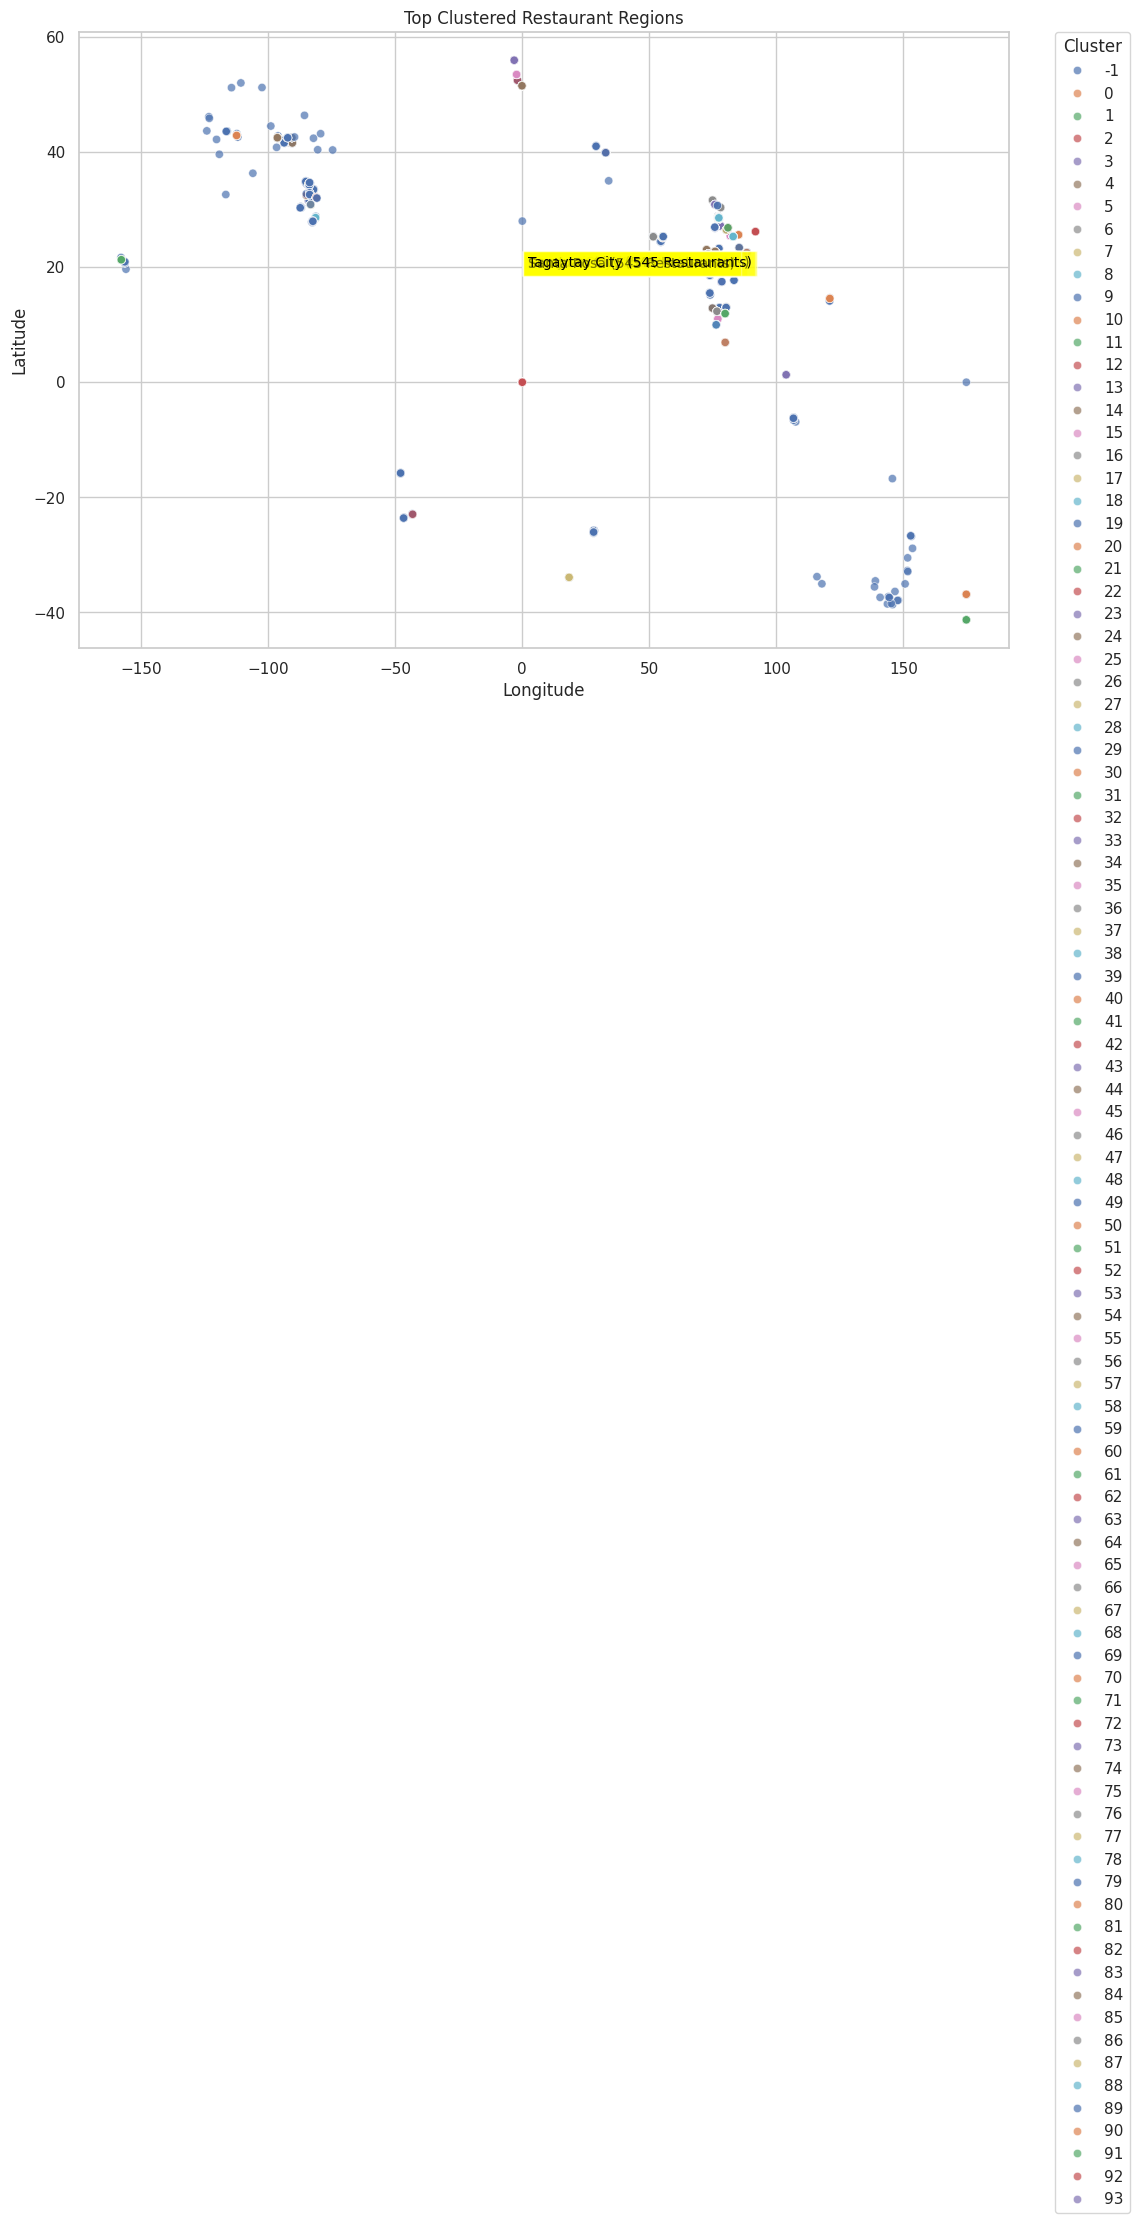

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="Cluster",
    palette="deep",
    edgecolor="white",
    alpha=0.7
)

# Annotate the top 10 clusters with their city/locality
for index, row in cluster_analysis.head(10).iterrows():
    plt.text(
        x=row['Longitude'],
        y=row['Latitude'],
        s=f"{row['City']} ({row['Count']} Restaurants)",
        fontdict=dict(color='black', size=10),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )

plt.title('Top Clustered Restaurant Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(
    df,
    x="Longitude",
    y="Latitude",
    color="Cluster",
    hover_name="City",
    hover_data={"Latitude": False, "Longitude": False},
    title="Top Clustered Restaurant Regions"
)

# Add annotations for top 10 clusters
for index, row in cluster_analysis.head(10).iterrows():
    fig.add_annotation(
        x=row['Longitude'] + 0.01,
        y=row['Latitude'] + 0.01,
        text=f"{row['City']} ({row['Count']} Restaurants)",
        showarrow=True,
        arrowhead=2
    )

fig.update_layout(
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    legend_title="Cluster"
)

fig.show()


In [ ]:
# Count the number of restaurants in each cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Merge cluster counts with cluster info to get more details
cluster_info = pd.merge(cluster_centers, df[['Cluster', 'City', 'Locality']].drop_duplicates(), on='Cluster', how='left')
cluster_analysis = pd.merge(cluster_info, cluster_counts, on='Cluster')

# Get the top 10 clusters by number of restaurants
top_clusters = cluster_analysis.head(10)['Cluster']


In [ ]:
# Filter the original DataFrame to get restaurants from the top clusters
top_restaurants = df[df['Cluster'].isin(top_clusters)]

# Extract the names of these restaurants
top_restaurant_names = top_restaurants[['Restaurant Name', 'Cluster']].drop_duplicates()

# Optionally, sort by cluster for better readability
top_restaurant_names = top_restaurant_names.sort_values(by='Cluster')

# Display the names
print(top_restaurant_names.head(10))  # Displaying first 10 for brevity


                                        Restaurant Name  Cluster
0                                      Le Petit Souffle       -1
2344                                       Chokhi Dhani       -1
2320                                              Oye24       -1
2319                          JAL - A Jungle Restaurant       -1
2318                                               KYRO       -1
2306  Jonathan's Kitchen - Holiday Inn Express & Suites       -1
2302                                            Chili's       -1
2300                                            Exotica       -1
2288                                          BrewBakes       -1
2179    The Living Room - The Westin Sohna Resort & Spa       -1


In [ ]:
# Count the number of restaurants in each city or locality
city_locality_counts = df.groupby(['City', 'Locality', 'Cluster']).size().reset_index(name='Count')

# Get the total count of restaurants per city/locality (considering all clusters)
city_locality_totals = city_locality_counts.groupby(['City', 'Locality'])['Count'].sum().reset_index()

# Sort cities/localities by the number of restaurants to find the most clustered areas
top_localities = city_locality_totals.sort_values(by='Count', ascending=False).head(10)

print(top_localities)


          City             Locality  Count
712  New Delhi      Connaught Place    122
860  New Delhi       Rajouri Garden     99
873  New Delhi             Shahdara     87
725  New Delhi       Defence Colony     86
846  New Delhi            Pitampura     85
812  New Delhi  Mayur Vihar Phase 1     84
807  New Delhi        Malviya Nagar     84
859  New Delhi       Rajinder Nagar     81
864  New Delhi           Safdarjung     80
870  New Delhi         Satyaniketan     79


In [ ]:
# Get the restaurant names in the top clustered areas
clustered_area_names = df[df[['City', 'Locality']].apply(tuple, axis=1).isin(top_localities[['City', 'Locality']].apply(tuple, axis=1))]

# Display restaurant names for the top clustered areas
for city, locality in top_localities[['City', 'Locality']].values:
    print(f"Restaurants in {city}, {locality}:")
    names = clustered_area_names[(clustered_area_names['City'] == city) & (clustered_area_names['Locality'] == locality)]['Restaurant Name'].tolist()
    print(", ".join(names[:10]))  # Displaying up to 10 names per locality
    print()


Restaurants in New Delhi, Connaught Place:
Amber, Attitude Kitchen & Bar, Cafe Coffee Day, Castle 9, Costa Coffee, Delhi Darbar Dhaba, Garam Dharam, Gola Sizzlers, Indian Coffee House, My Bar Lounge & Restaurant

Restaurants in New Delhi, Rajouri Garden:
Bablu Chic-Inn, Babu Jhatka, Bal Gopal, Bharat Sweets, Cafe Blue Tomato, Cafe TAB, Cake-O-Licious, Chaap Point, Chawla Family Restaurant, Chawla Family Restaurant

Restaurants in New Delhi, Shahdara:
Aapka Bhojanalaya, Aayana Foods, Aggarwal Sweet India, Amchur, Anand Ji de Choley Bhatoore, Annapoorna, Big Bite, Ceaser Fast Food Centre, Chanana Ice Cream Parlour, Chaska

Restaurants in New Delhi, Defence Colony:
Aka Saka, Anil Mishtan Wala, Barista, Cafe 1 Fast Food, Cake Central - Premier Cake Design Studio, Chawla's Tandoori Junction, Chawnsan Chef, Choco Kraft, Colonel's Kababz, Confectionately Seerat's

Restaurants in New Delhi, Pitampura:
361 Restaurant & Banquet, 6 Pack Momos, Amritsari Kulcha, Bake Houz, Ben's Foods, Bobby Punja

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Extract coordinates
coords = df[['Latitude', 'Longitude']].values

# Apply DBSCAN
db = DBSCAN(eps=0.02, min_samples=5, metric='euclidean').fit(coords)

# Add cluster labels to the DataFrame
df['Cluster'] = db.labels_

# Check the number of restaurants in each cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Display cluster counts
print(cluster_counts)


    Cluster  Count
0        50   5503
1        48   1720
2        -1    545
3        32    497
4        47    229
..      ...    ...
90       73      5
91       17      5
92       18      5
93       93      5
94       59      4

[95 rows x 2 columns]


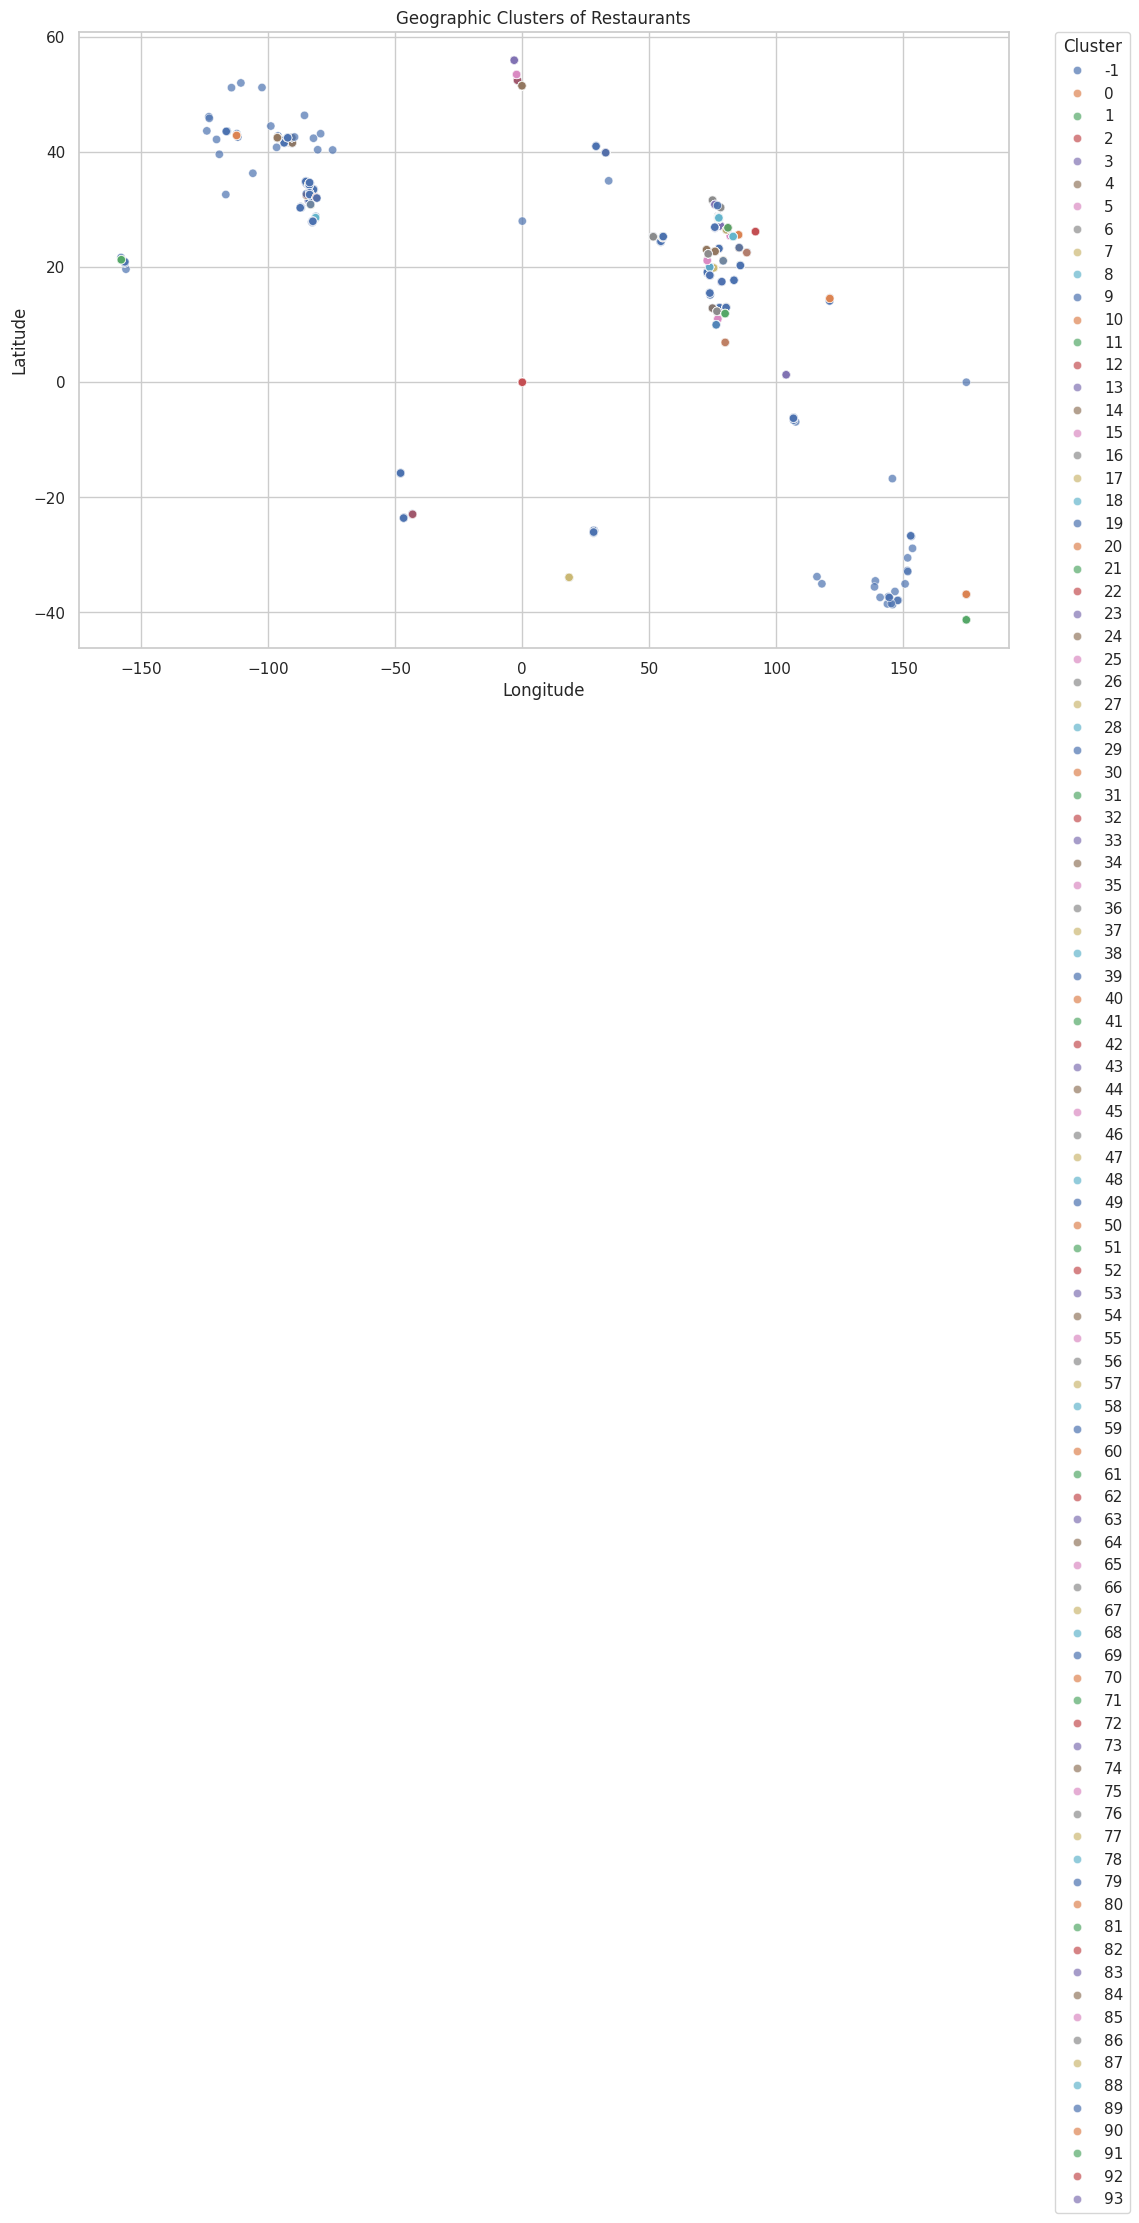

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Scatter plot of restaurants with clusters
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="Cluster",
    palette="deep",
    edgecolor="w",
    alpha=0.7
)

plt.title('Geographic Clusters of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


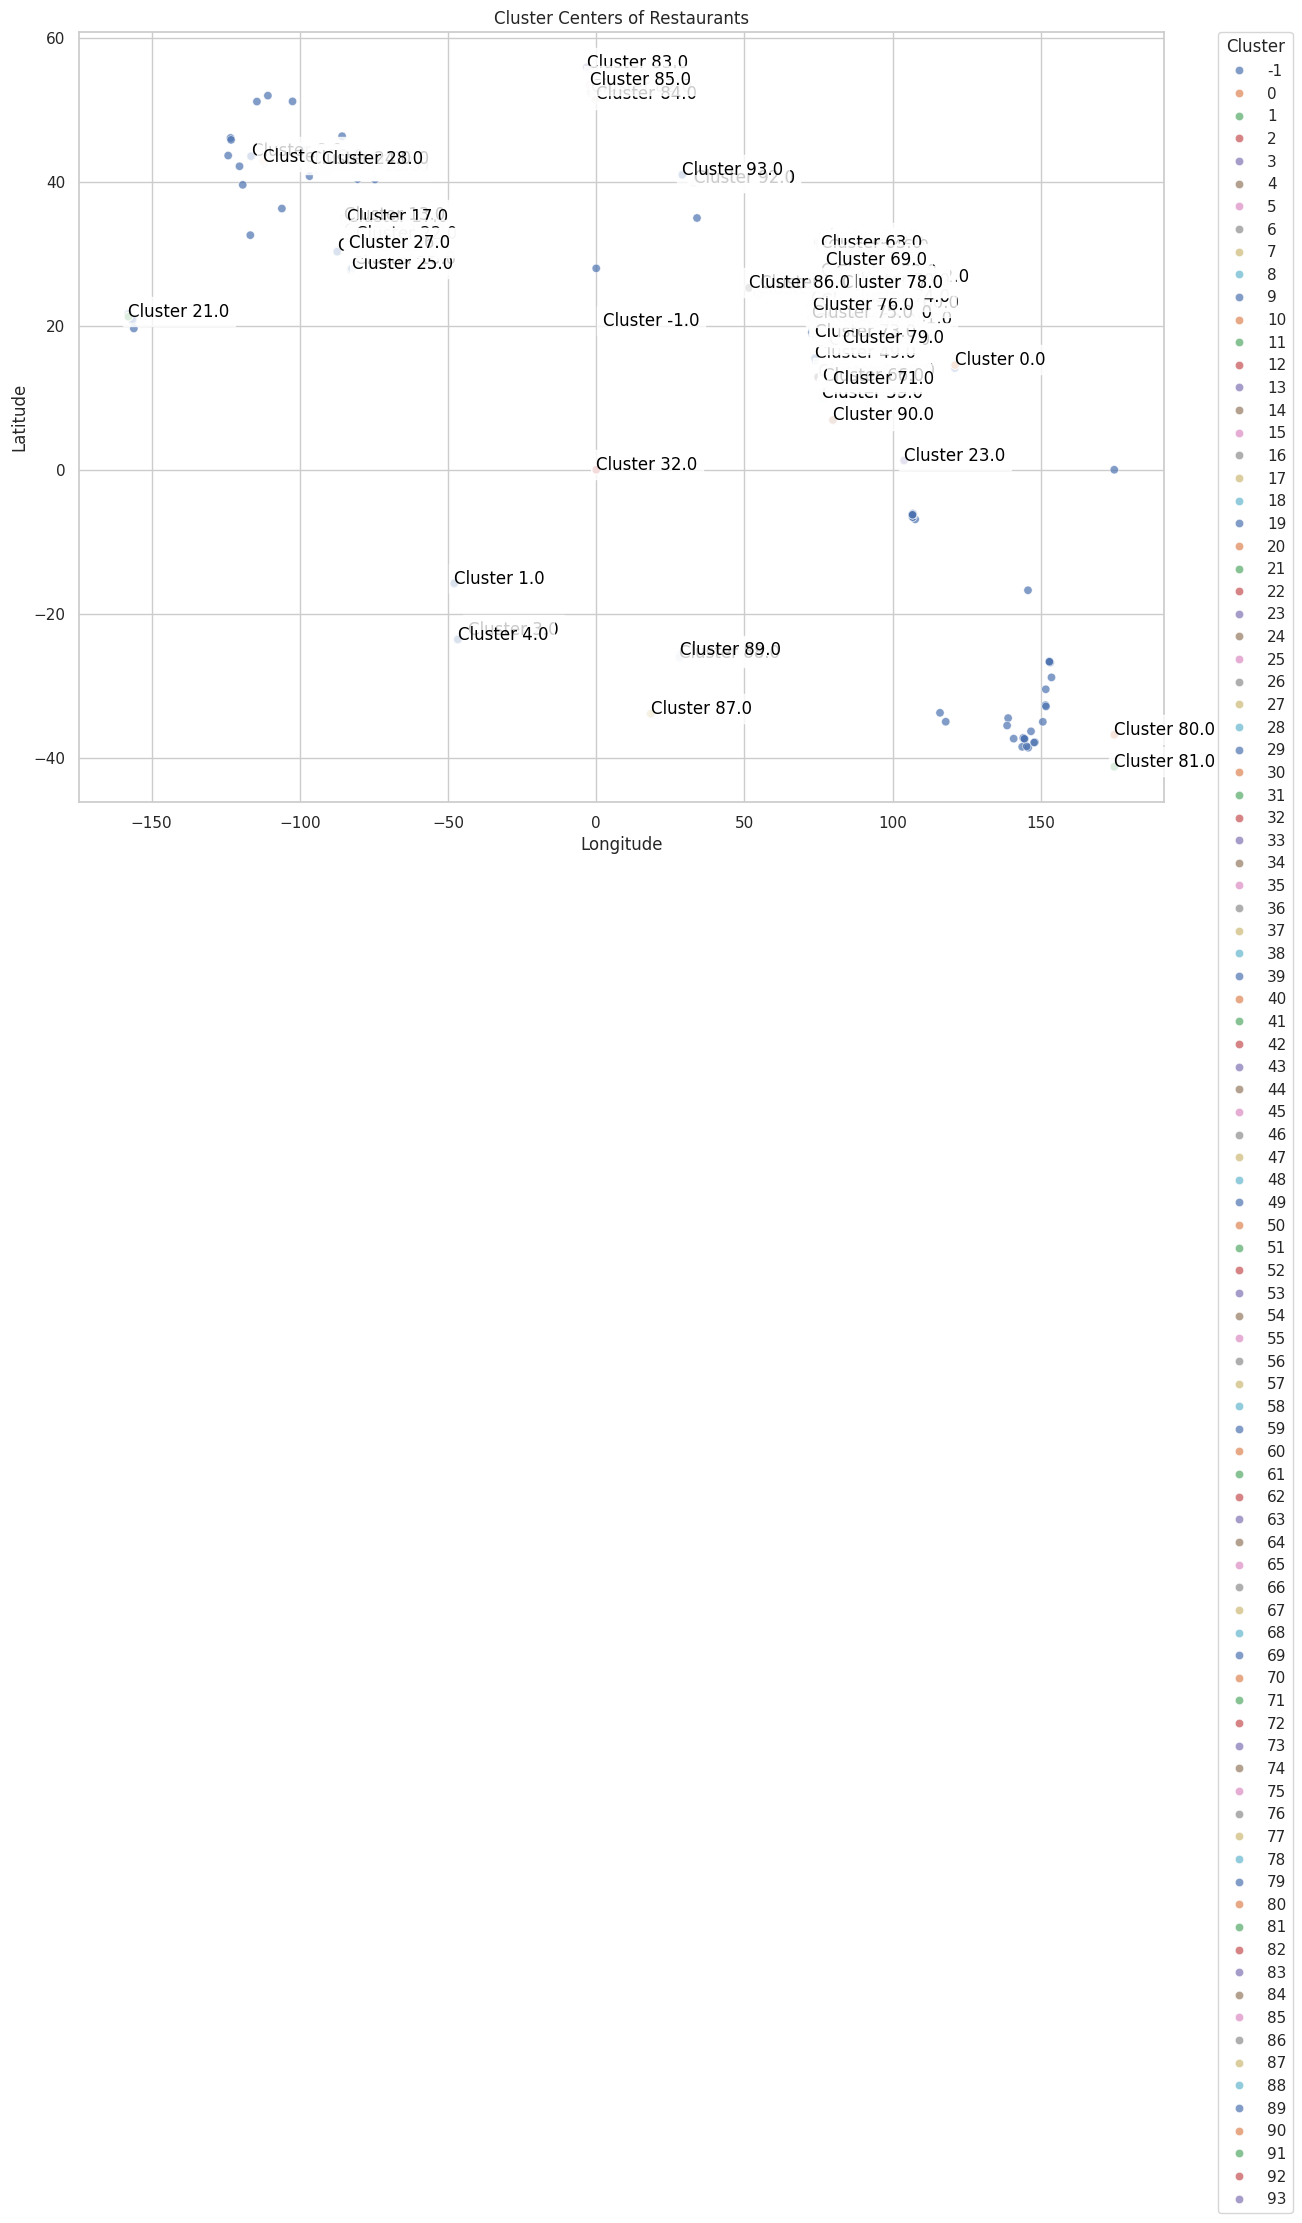

In [ ]:
# Calculate cluster centers
cluster_centers = df.groupby('Cluster')[['Latitude', 'Longitude']].mean().reset_index()

plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="Cluster",
    palette="deep",
    edgecolor="w",
    alpha=0.7
)

# Annotate cluster centers
for _, row in cluster_centers.iterrows():
    plt.text(
        x=row['Longitude'],
        y=row['Latitude'],
        s=f"Cluster {row['Cluster']}",
        fontdict=dict(color='black', size=12),
        bbox=dict(facecolor='white', alpha=0.8)
    )

plt.title('Cluster Centers of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


In [ ]:
# Calculate cluster centers
cluster_centers = df.groupby('Cluster')[['Latitude', 'Longitude']].mean().reset_index()
cluster_centers.columns = ['Cluster', 'Center_Latitude', 'Center_Longitude']


In [ ]:
from geopy.distance import great_circle

def find_nearest_city(lat, lon, city_locality_df):
    nearest_city = None
    min_distance = float('inf')

    for _, row in city_locality_df.iterrows():
        city_lat = row['Latitude']
        city_lon = row['Longitude']
        distance = great_circle((lat, lon), (city_lat, city_lon)).meters

        if distance < min_distance:
            min_distance = distance
            nearest_city = row['City']  # Or 'Locality' if that's what you have

    return nearest_city

# Create a DataFrame with city/locality coordinates
city_locality_df = df[['City', 'Locality', 'Latitude', 'Longitude']].drop_duplicates()

# Add nearest city/locality names to cluster centers
cluster_centers['Nearest_Area'] = cluster_centers.apply(
    lambda row: find_nearest_city(row['Center_Latitude'], row['Center_Longitude'], city_locality_df),
    axis=1
)


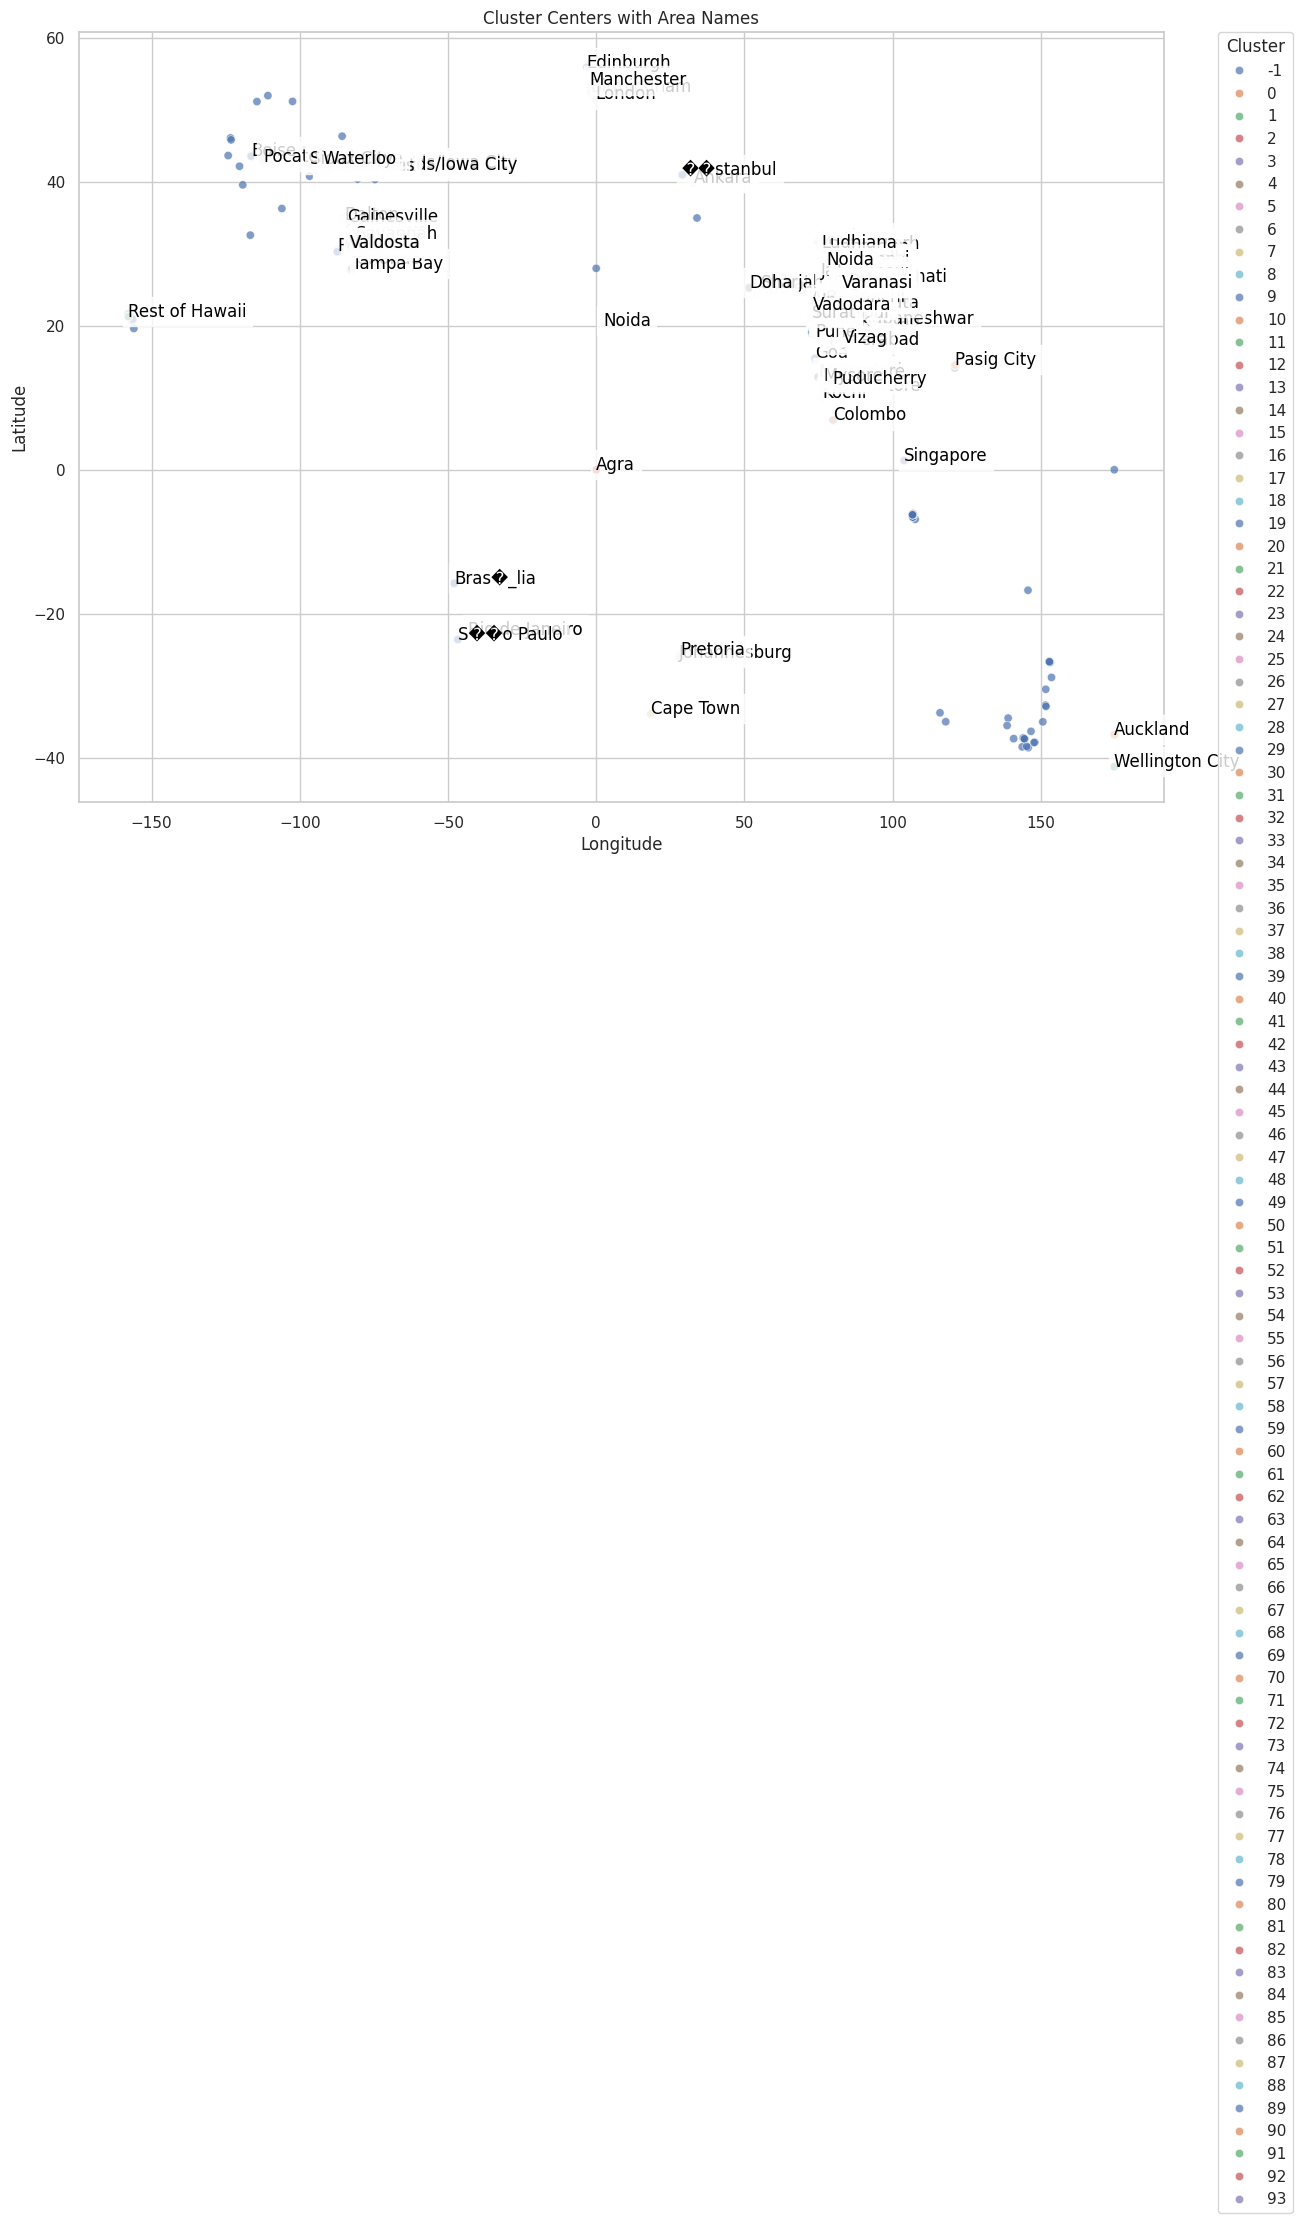

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Scatter plot of all restaurants
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="Cluster",
    palette="deep",
    edgecolor="w",
    alpha=0.7
)

# Plot cluster centers with annotations
for _, row in cluster_centers.iterrows():
    plt.text(
        x=row['Center_Longitude'],
        y=row['Center_Latitude'],
        s=row['Nearest_Area'],
        fontdict=dict(color='black', size=12),
        bbox=dict(facecolor='white', alpha=0.8)
    )

plt.title('Cluster Centers with Area Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


In [ ]:
# Check for duplicate restaurant names to identify chains
chain_counts = df['Restaurant Name'].value_counts()
chain_names = chain_counts[chain_counts > 1].index

print(f"Possible Restaurant Chains: {chain_names}")


Possible Restaurant Chains: Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation',
       ...
       'Raasta', 'The Pint Room', 'Snacks Point', 'The Dosa King', 'Chokola',
       'Town Hall', 'Halki Aanch', 'Snack Junction', 'Delhi Biryani Hut',
       'Beliram Degchiwala'],
      dtype='object', name='Restaurant Name', length=734)


In [ ]:
# Filter the dataset to include only the identified chains
chain_data = df[df['Restaurant Name'].isin(chain_names)]

# Calculate average ratings and total votes for each chain
chain_analysis = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()

# Sort by average rating and total votes
chain_analysis = chain_analysis.sort_values(by=['Aggregate rating', 'Votes'], ascending=False)

print(chain_analysis)


               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in             0.000      0

[734 rows x 3 columns]


<ipython-input-64-091fd4230a3e>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-64-091fd4230a3e>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




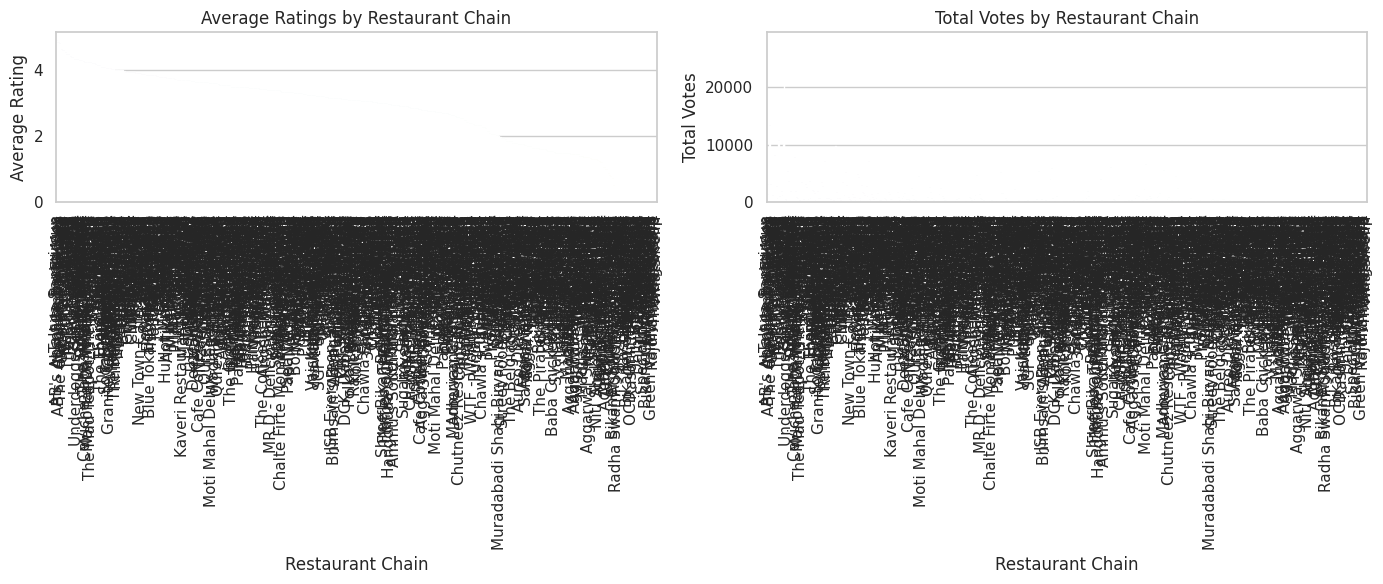

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot ratings
plt.subplot(1, 2, 1)
sns.barplot(
    data=chain_analysis,
    x='Restaurant Name',
    y='Aggregate rating',
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Average Ratings by Restaurant Chain')
plt.xlabel('Restaurant Chain')
plt.ylabel('Average Rating')

# Plot votes
plt.subplot(1, 2, 2)
sns.barplot(
    data=chain_analysis,
    x='Restaurant Name',
    y='Votes',
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Total Votes by Restaurant Chain')
plt.xlabel('Restaurant Chain')
plt.ylabel('Total Votes')

plt.tight_layout()
plt.show()


<ipython-input-65-c39712831529>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-65-c39712831529>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




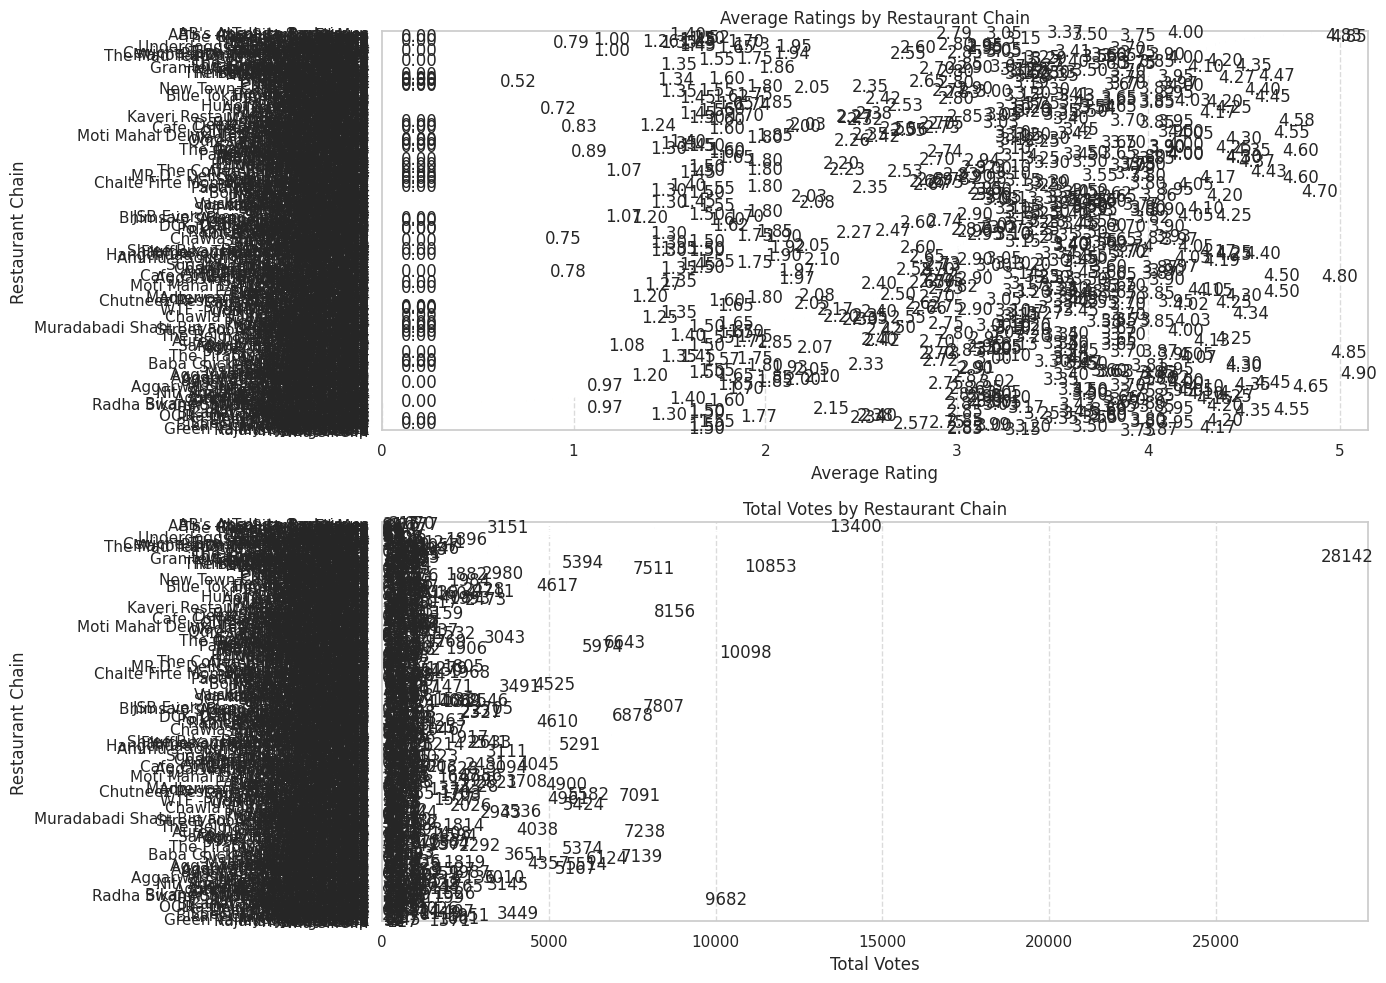

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 10))

# Plot ratings
plt.subplot(2, 1, 1)
sns.barplot(
    data=chain_analysis,
    y='Restaurant Name',
    x='Aggregate rating',
    palette='viridis'
)
plt.title('Average Ratings by Restaurant Chain')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Chain')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations
for index, row in chain_analysis.iterrows():
    plt.text(
        x=row['Aggregate rating'] + 0.1,  # Adjust offset as needed
        y=index,
        s=f"{row['Aggregate rating']:.2f}",
        va='center'
    )

# Plot votes
plt.subplot(2, 1, 2)
sns.barplot(
    data=chain_analysis,
    y='Restaurant Name',
    x='Votes',
    palette='viridis'
)
plt.title('Total Votes by Restaurant Chain')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Chain')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations
for index, row in chain_analysis.iterrows():
    plt.text(
        x=row['Votes'] + 0.1,  # Adjust offset as needed
        y=index,
        s=f"{row['Votes']}",
        va='center'
    )

plt.tight_layout()
plt.show()


In [ ]:
# Count occurrences of each restaurant name
chain_counts = df['Restaurant Name'].value_counts()

# Identify restaurant chains with more than one occurrence
chain_names = chain_counts[chain_counts > 1].index

print(f"Possible Restaurant Chains: {chain_names}")


Possible Restaurant Chains: Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation',
       ...
       'Raasta', 'The Pint Room', 'Snacks Point', 'The Dosa King', 'Chokola',
       'Town Hall', 'Halki Aanch', 'Snack Junction', 'Delhi Biryani Hut',
       'Beliram Degchiwala'],
      dtype='object', name='Restaurant Name', length=734)


In [ ]:
# Filter the dataset to include only the restaurant chains
chain_data = df[df['Restaurant Name'].isin(chain_names)]

# Calculate average rating and total votes for each chain
chain_analysis = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',  # Average rating
    'Votes': 'sum'               # Total votes
}).reset_index()

# Sort the data by average rating and total votes for better readability
chain_analysis = chain_analysis.sort_values(by=['Aggregate rating', 'Votes'], ascending=False)

print(chain_analysis)


               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in             0.000      0

[734 rows x 3 columns]


In [ ]:
# Display the summarized table
print(chain_analysis)


               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in             0.000      0

[734 rows x 3 columns]


In [ ]:
# Top 10 chains by average rating
top_rated_chains = chain_analysis.sort_values(by='Aggregate rating', ascending=False).head(10)
print("Top 10 Chains by Average Rating:")
print(top_rated_chains)

# Top 10 chains by total votes
most_popular_chains = chain_analysis.sort_values(by='Votes', ascending=False).head(10)
print("\nTop 10 Chains by Total Votes:")
print(most_popular_chains)


Top 10 Chains by Average Rating:
               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
589           Silantro Fil-Mex             4.850   1364
8      AB's Absolute Barbecues             4.850   3151
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
293                   Gymkhana             4.700    328
653     The Cheesecake Factory             4.650   3010
218                    Dishoom             4.600   1269
267          Garota de Ipanema             4.600     59
163                    Chili's             4.580   8156

Top 10 Chains by Total Votes:
               Restaurant Name  Aggregate rating  Votes
62             Barbeque Nation          4.353846  28142
7    AB's - Absolute Barbecues          4.825000  13400
79                   Big Chill          4.475000  10853
239                 Farzi Cafe          4.366667  10098
692                   Truffles          

In [ ]:
# Correlation between ratings and votes
correlation = chain_analysis[['Aggregate rating', 'Votes']].corr().iloc[0, 1]
print(f"Correlation between Average Rating and Total Votes: {correlation:.2f}")


Correlation between Average Rating and Total Votes: 0.33


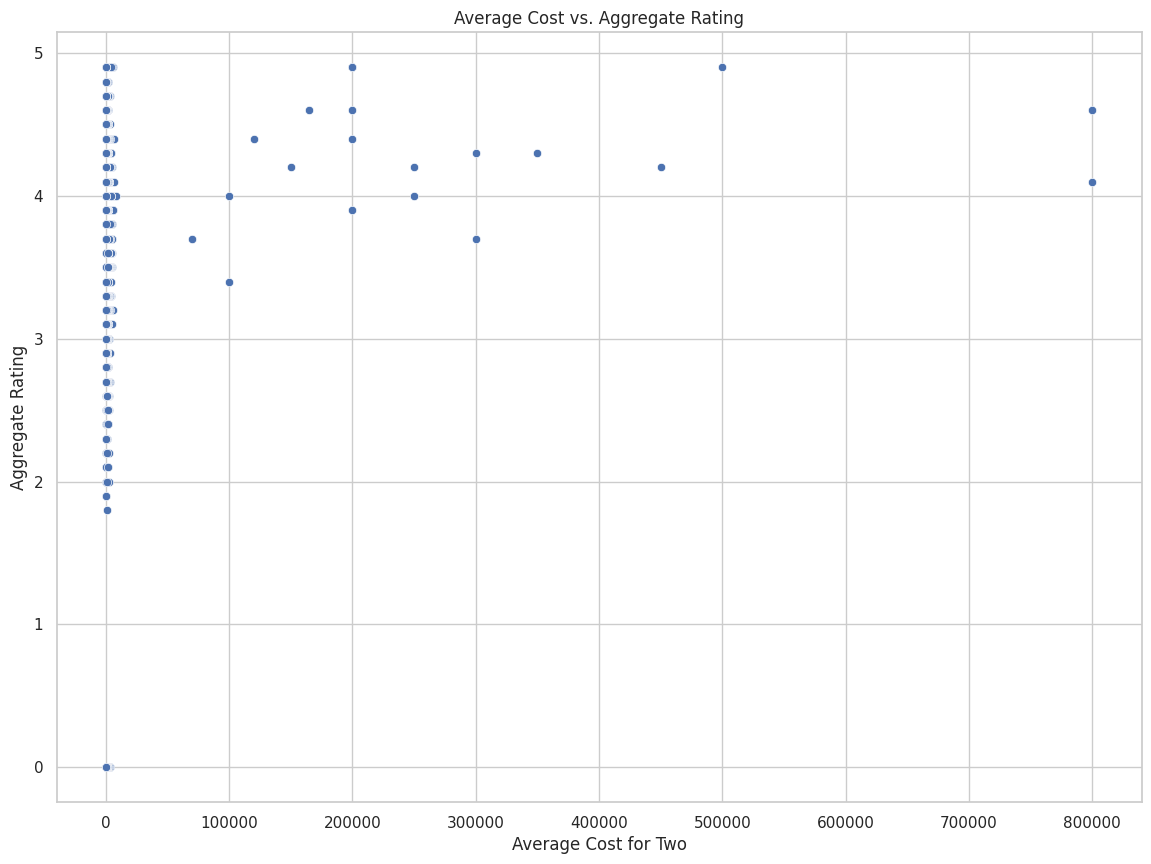

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


In [ ]:
# Scatter plot of Average Cost vs. Aggregate Rating
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating')
plt.title('Average Cost vs. Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()

# Group by Price Range and calculate average rating
price_range_rating = df.groupby('Price range')['Aggregate rating'].mean()
print(price_range_rating)

# Analysis of binary features like table booking and online delivery
table_booking_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()
online_delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(table_booking_rating)
print(online_delivery_rating)


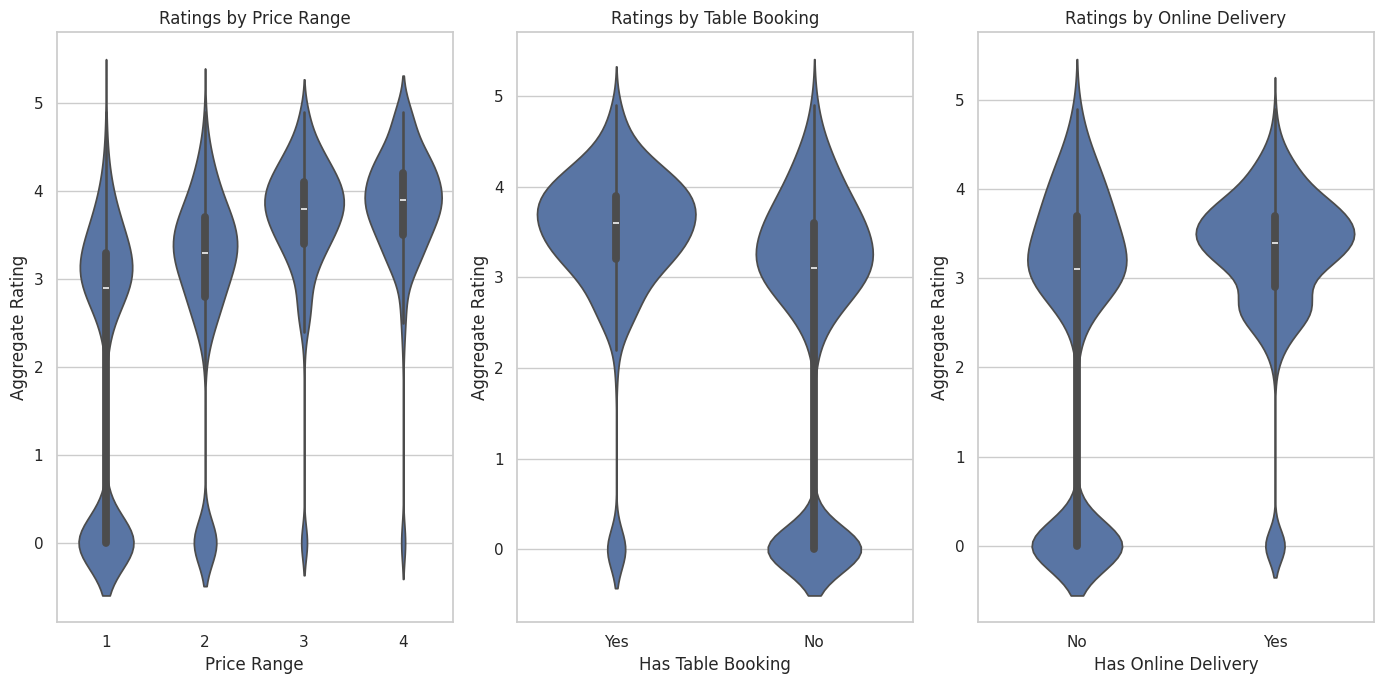

In [ ]:
plt.figure(figsize=(14, 7))

# Violin plot for Price Range
plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='Price range', y='Aggregate rating')
plt.title('Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')

# Violin plot for Table Booking
plt.subplot(1, 3, 2)
sns.violinplot(data=df, x='Has Table booking', y='Aggregate rating')
plt.title('Ratings by Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')

# Violin plot for Online Delivery
plt.subplot(1, 3, 3)
sns.violinplot(data=df, x='Has Online delivery', y='Aggregate rating')
plt.title('Ratings by Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')

plt.tight_layout()
plt.show()


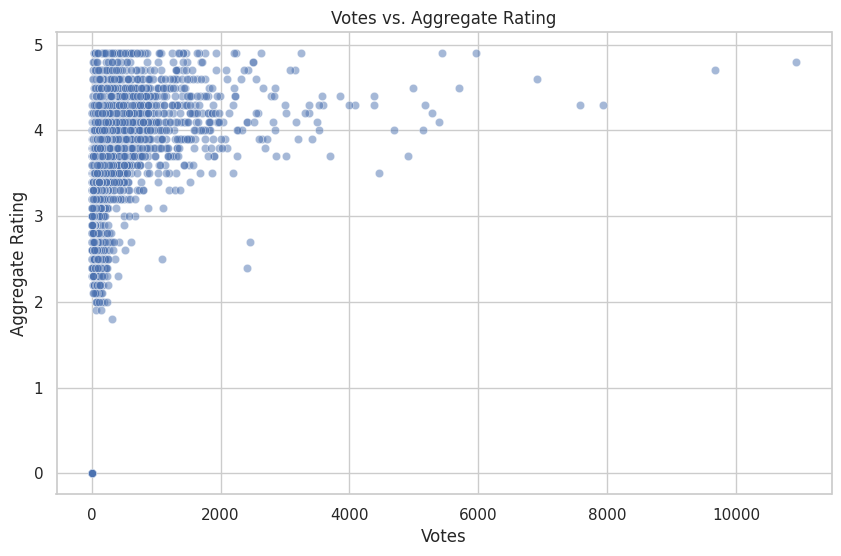

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot with transparency
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5)
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob



# Ensure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Check the columns to confirm the 'Rating text' column exists
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine Combinations', 'Cluster'],
      dtype='object')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing to the 'Rating text' column
df['tokens'] = df['Rating text'].astype(str).apply(preprocess_text)


In [ ]:
# Define sentiment function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Get sentiment for each review
df['Sentiment'] = df['Rating text'].astype(str).apply(get_sentiment)

# Separate positive and negative reviews
positive_reviews = df[df['Sentiment'] > 0]['Rating text']
negative_reviews = df[df['Sentiment'] < 0]['Rating text']


In [ ]:
# Tokenize and count keywords for positive reviews
positive_tokens = [token for sublist in positive_reviews.apply(preprocess_text) for token in sublist]
positive_counts = Counter(positive_tokens)
positive_df = pd.DataFrame(positive_counts.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Tokenize and count keywords for negative reviews
negative_tokens = [token for sublist in negative_reviews.apply(preprocess_text) for token in sublist]
negative_counts = Counter(negative_tokens)
negative_df = pd.DataFrame(negative_counts.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the top 10 positive and negative keywords
print("Top 10 Positive Keywords:")
print(positive_df.head(10))
print("\nTop 10 Negative Keywords:")
print(negative_df.head(10))


Top 10 Positive Keywords:
     Keyword  Frequency
1       good       3179
0  excellent        301

Top 10 Negative Keywords:
   Keyword  Frequency
0  average       3737
1     poor        186


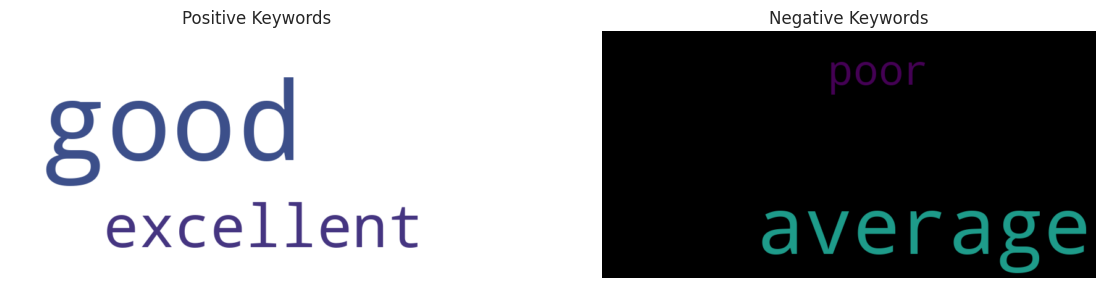

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for positive keywords
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(positive_counts))

# Generate word cloud for negative keywords
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(dict(negative_counts))

# Plot word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Keywords')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Keywords')

plt.show()
